# EPA1333 - Computer Engineering for Scientific Computing
## Week 7 - Oct 17, 2017

**Python Data Science Handbook**

*Jake VanderPlas*


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Links

  * [Pandas Exercises](https://github.com/guipsamora/pandas_exercises)
  * [100 pandas puzzles (well incomplete...)](https://github.com/ajcr/100-pandas-puzzles)
  
  * [Walkthrough exercises from PandasTutorial by Wes McKinney](https://github.com/lemonbalm/pandas-exercises)
  Note: you need to convert these to Python3 first.
  * [A few common Excel tasks in Pandas](http://pbpython.com/excel-pandas-comp.html)
  
  * Some more Tutorials:
    * https://apawlik.github.io/2014-04-09-GARNET/lessons/garnet/pandas/tutorial.html
    * http://efavdb.com/pandas-tips-and-tricks/


# Pandas exercises

## Exercise 3: MovieLens Ratings



### Import data

You can find MovieLens ratings [here](http://grouplens.org/datasets/movielens/).


  1. Download the file [ml-1m.zip](http://files.grouplens.org/datasets/movielens/ml-1m.zip) with 1 million ratings by 6000 users on 4000 movies. 
  2. Unzip the file. This will give you 4 files (README and 3 data files).
  3. Read the README and browse through the data files to understand the structure of the data.
  
  HINT: Use **the read_csv()** command with appropiate arguments

#### Q1: Read the 3 dat files into three separate DataFrames. Name the dataframes and name the columns appropriately.

In [3]:
# we put the data files in folder names 'ml' (for movielens)
# let's first check what we have

# ... # for windows
!head 'ml/ratings.dat' # for mac/linux

'head' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# read the three separate datafiles
# set the separator for the data file (and the engine to avoid the warning from Python)
# name the columns appropriately from the README
# check the correctness of the data import

ratings = pd.read_csv( 'ml/ratings.dat', sep='::', engine='python', 
                          names=['UserID','MovieID','Rating','Timestamp'])
ratings[:5]

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv( 'ml/users.dat', sep='::', engine='python',
                       names=['UserID','Gender','Age','Occupation','Zip-code'])
users[:5]

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
movies = pd.read_csv( 'ml/movies.dat', sep='::', engine='python', 
                        names=['MovieID','Title','Genres'])
movies[:5]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### Q2:  How many users are there? And how many are men and how many are women?

In [7]:
len(users.UserID)

# Alterbative
users.UserID.count()

6040

In [ ]:
users.Gender.value_counts()

#### Q3: How many ratings are there? How many were made by man and how many by women? Express it in percentages.

In [8]:
len(ratings.UserID)

# Alternatives
ratings.count()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
# in order to find out how many ratings were made by each gender we merge the 'ratings' and 'users' tables
user_ratings = pd.merge( users, ratings )
user_ratings[:5]

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [10]:
# now we can count
user_ratings.Gender.value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [11]:
# as a percentage
user_ratings.Gender.value_counts() / len(ratings.UserID) * 100

M    75.36115
F    24.63885
Name: Gender, dtype: float64

#### Q4: What is the average rating given? What is the average rating given by men and by women separately? Does one gender rate higher on average?


In [12]:
# avarege rating
user_ratings.Rating.mean()

3.581564453029317

In [13]:
# average rating men
ratings_men = user_ratings[ user_ratings.Gender == 'M' ].Rating
ratings_men.mean()

3.5688785290984373

In [14]:
# average rating women
ratings_women = user_ratings[ user_ratings.Gender == 'F' ].Rating
ratings_women.mean()

3.6203660120110372

#### Q5: Plot histograms of the ratings given by men and women in 2 plots, side-by-side.

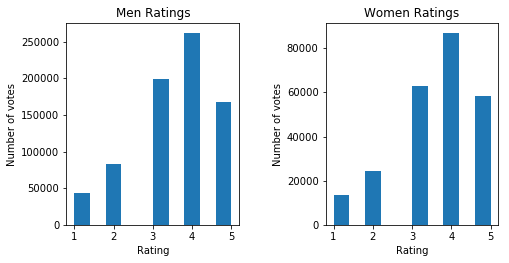

In [15]:
# first plot the men
plt.subplot(1,2,1)
plt.hist(ratings_men)
plt.title("Men Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of votes")

# now plot the women
plt.subplot(1,2,2)
plt.hist(ratings_women)
plt.title("Women Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of votes")

# make the layout of the subplots, so they do not overlap.
plt.tight_layout()

# you can play around with the layout of subplots in detail with: 
plt.subplots_adjust(left=0, right=1, top=0.7, bottom=0.0, hspace=0.0, wspace=0.5)

## DateTime

Pandas support dates with its own data type.

```python
pandas.datetime
```
   
   or
   
```python
pandas.Timestamp
```
   
   
Both represents year, month, day, hours, seconds, milliseconds and are more or less interchangeable.

You can create such a datetime/Timstamp object from a timestamp string using:

    date = pd.datetime.from_timestamp( timestamp )
    
A more generic timestamp creator is:

    date = pd.to_datetime( timestamp or (series of timestamps), unit="xxx" ) 
    
This function will recognize different notations of time (not just timestamps). However,
you may need to indicate what type it is using the "unit" keyword.


#### Q6: Add an extra column to the ratings table containing a 'real date' (year, month, day, hours, seconds) instead of a string timestamp. Try it with ```pd.datetime.fromtimestamp``` as well as ```pd.to_datetime```. Do you notice any difference?

*Hint*: If you want to apply a function to an entire column, you can use the function ```apply```:

For example:

    dataframe['ColumnName'].apply( np.sqrt )  # NOTE np.sqrt, not np.sqrt(). 
                                              # We pass the function itself, not calling it!

will apply the function ```np.sqrt``` to each value in the column "ColumnName" of the dataframe and return the result. Note: ```np.sqrt``` is special in that it can also be called as:
    
    np.sqrt( dataframe(['ColumnName'] )
    


In [17]:
# use pd.datetime.fromtimestamp

ratings['Date']=ratings.Timestamp.apply(pd.datetime.fromtimestamp)
ratings[:5]

,UserID,MovieID,Rating,Timestamp,Date
0,1,1193,5,978300760,2000-12-31 23:12:40
1,1,661,3,978302109,2000-12-31 23:35:09
2,1,914,3,978301968,2000-12-31 23:32:48
3,1,3408,4,978300275,2000-12-31 23:04:35
4,1,2355,5,978824291,2001-01-07 00:38:11


In [ ]:
# use pd.to_datetime
# we can use apply() here too, but that is really slow.
# Try at your own risk, it might take a while!

#ratings['Date']=ratings.Timestamp.apply(pd.to_datetime, unit="s")

#ratings[:5]

In [18]:
# instead, we can use pd.to_datetime to work on entire Series at once.
# this is a lot quicker!
#
# also note the use of the "unit" keyword, to indicate the timestamp is in seconds since the
# last epoch (1-1-1970)
ratings['Date'] = pd.to_datetime(ratings.Timestamp, unit="s")

ratings[:10]

,UserID,MovieID,Rating,Timestamp,Date
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11
5,1,1197,3,978302268,2000-12-31 22:37:48
6,1,1287,5,978302039,2000-12-31 22:33:59
7,1,2804,5,978300719,2000-12-31 22:11:59
8,1,594,4,978302268,2000-12-31 22:37:48
9,1,919,4,978301368,2000-12-31 22:22:48


#### Q7: Give an overview of the ratings given per year.

*Hint*: Datetime and Timestamp data types allow access to their individual members (year, month, day, hour, minute, seconds.

For example:
  
    ts = pd.Timestamp("2016-10-16")
    ts.year -> 2016
    ts.day -> 16
    
In a dataframe you can access these datetime/Timestamp methods by using

    dataframe['Columnname'].dt.year
    
 

In [19]:
ratings.Date.dt.year.value_counts()

2000    904757
2001     68058
2002     24046
2003      3348
Name: Date, dtype: int64

#### Q8: How many genres are there? (Count them from the tables, verify with what you find in the README)

In [20]:
genres = set()
for g in movies.Genres:
    genres.update( g.split("|") )
    
len(genres)

18

#### Q9: Count how many movies there are in each genre category.

In [21]:
# we can create a new column for each genre. 
# each movie will have True or False in that column

# first get a sorted list of genres, so columns are created in order
genres = sorted(genres)

for genre in genres:
    # create a new column, the content is True/False for each movie
    movies[genre] = [ genre in movie_genres.split("|") for movie_genres in movies.Genres ] 
    
movies[:5]

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children's|Fantasy,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Now use sum() to count the values per genre
movies.iloc[:,3:].sum()

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

#### Q10: How many ratings did the movie 'Casino (1995)' receive? What was the average rating for this movie?

In [23]:
# merge all three tables into one big one.
db = movies.merge(ratings).merge(users)

# count the number of ratings for the movie
db[db.Title == 'Casino (1995)'].Rating.count()

682

In [24]:
# determine the avarage score
db[db.Title == 'Casino (1995)'].Rating.mean()

3.7932551319648096

#### Q11: What was the average rating of men for this movie? What was the average of women for this movie?

In [ ]:
# avarage rating for men for Casino (1995)
db[ (db.Title == 'Casino (1995)') & (db.Gender == 'M') ].Rating.mean()

In [ ]:
# avarage rating for women for Casino (1995)
db[ (db.Title == 'Casino (1995)') & (db.Gender == 'F') ].Rating.mean()